# **Measuring the Stellar Mass of Large Magellanic Cloud and Milky Way Size Galaxies**

This notebook will serve to show all of the code written for Lasata Tuladhar's undergraduate thesis, submitted in partial completion of the requirement of the B.S. Astronomy-Physics major for the University of Virginia. This thesis was submitted on May 10th, 2024.

### **Abstract**

This thesis will explore an approach to measuring the cumulative star formation history (SFH) of galaxies with sizes comparable to the Large Magellanic Cloud (LMC) and the Milky Way (MW), and their satellites. The stellar mass threshold for LMCs will be set as 1.00 × 10^9 - 1.00 × 10^10 M⊙, and 1.00 × 10^10 - 1.00 × 10^11 M⊙ for MWs. The historic and current stellar masses that will be used to determine the cumulative SFH will be provided by the Shin-Uchuu simulation. This high-resolution simulation allows for the ultra faint dwarf (UFD) satellite galaxies to be included in the study. The Universe Machine (UM) model will be utilized in order to track the accretion of dark matter, which in turn tracks baryonic matter and leads to the SFH over lookback time. 10,000 random samples of the cumulative SFH will be taken and 1,000 will be plotted for all analogs and satellites. Satellites will be categorized into two types: classicals, which have a stellar mass of 1.00 × 10^5 - 1.00 × 10^7 M⊙, and UFDs, which have a stellar mass of 1.00 × 10^5 M⊙ and below. These results will show that star formation generally increases over lookback time for these analogs.

### **Step 1:** Download all data using the HDF5 file format.

The data was internally provided to the student for this thesis, but a snapshot of the data can be found here: https://www.skiesanduniverses.org/Simulations/Uchuu/. The external data files will be added to the GitHub for completeness.

### **Step 2:** Import all necessary libraries.

In [1]:
# !pip install nbconvert
# !pip install --upgrade pip
# nbconvert --to pdf notebook.ipynb
# !pip install --upgrade h5py
# !pip install --upgrade numpy
# !pip install --upgrade numba
# !pip install --upgrade llvmlite
# !pip install llvmlite --ignore-installed
# !pip install -U notebook-as-pdf
# !pip install --upgrade pip

In [188]:
# imports
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [189]:
# formatting plots for final
pdf = PdfPages('final_multi.pdf')
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### **Step 3:** Read in the first data file and check attributes.

In [192]:
# reading in file

halocat = h5py.File("/Users/maniktuladhar/Desktop/UVA/UVA\ 4th\ Year/UVA\ Spring\ \'24/Thesis/ShinUchuu_UM_z0p00_data1.h5", "r") 

# please replace with the local path for 

In [193]:
list(halocat.keys()) # check keys available (like dict keys) - descriptions in .txt file

['Mvir', 'icl', 'id', 'obs_sfr', 'obs_sm', 'obs_uv', 'sfr', 'sm', 'upid']

In [194]:
list(halocat.attrs.keys()) # check available attributes / metadata

['UniverseMachine Version',
 'TotNhalos',
 'Boxsize',
 'ascale',
 'Hubble',
 'Omega0',
 'OmegaLambda',
 'OmegaBaryon',
 'PrimodialIndex',
 'Sigma8',
 'Header']

In [195]:
halocat.attrs["Header"].split("\n") # check header

['#ShinUchuu-UniverseMachine galaxies',
 '--------',
 '#id: Unique halo ID. Share the ID with dark matter halo (appeared in Rockstar hlist catalogs and merger trees) in which galaxy resides if it is not an orphan. For orphans, the id is the last ID in the hlist + 10^15 * (number of snapshots as an orphan)',
 '#upid: -1 for central halos, otherwise, ID of largest parent halo',
 '#Mvir: Halo mass (Bryan & Norman 1998 virial mass, Msun)',
 '#sm: True stellar mass (Msun)',
 '#icl: True intracluster stellar mass (Msun)',
 '#sfr: True star formation rate (Msun/yr)',
 '#obs_sm: observed stellar mass, including random & systematic errors (Msun)',
 '#obs_sfr: observed SFR, including random & systematic errors (Msun/yr)',
 '#obs_uv: Observed UV Magnitude (M_1500 AB)',
 '--------',
 '#x y z: halo position (comoving Mpc/h)',
 '--------',
 '#desc_id: ID of descendant halo (or -1 at z=0).',
 '#vx vy vz: halo velocity (physical peculiar km/s)',
 '#Mpeak: Halo peak historical mass (BN98 vir, Msun)',
 

In [196]:
halocat["id"].shape # check shape of individual dataset, (#halos,)

(53750825,)

In [197]:
type(halocat["id"])

h5py._hl.dataset.Dataset

In [198]:
# data6 contains historical stellar masses for each halo along the main progenitor branch

SMcat = h5py.File("/Users/maniktuladhar/Desktop/Thesis/ShinUchuu_UM_z0p00_data6.h5", "r")

In [199]:
list(SMcat.keys()) # check keys available. Only one key, "SM_main_progenitor"

['SM_main_progenitor']

In [200]:
list(SMcat.attrs.keys()) # check available attributes / metadata

['UniverseMachine Version',
 'Header',
 'TotNhalos',
 'Boxsize',
 'ascale',
 'Hubble',
 'Omega0',
 'OmegaLambda',
 'OmegaBaryon',
 'PrimodialIndex',
 'Sigma8',
 'num_scales',
 'scale_list']

In [201]:
SMcat.attrs["Header"].split("\n") # check header

['#ShinUchuu-UniverseMachine galaxies',
 '--------',
 '#Units: all masses in Msun (no h).',
 '#Units: all velocities in km/s (physical, not comoving).',
 '#a: 0.999984',
 '#Hubble: 0.6774',
 '#Omega0: 0.3089',
 '#OmegaLambda: 0.6911',
 '#OmegaBaryon: 0.0486',
 '#PrimodialIndex :0.9667',
 '#Sigma8: 0.8159',
 '#Boxsize: 140.0 Mpc/h',
 '#sm cut: 1.000000e+03 Msun',
 '#num_scales: 70',
 '#scale_list: [0.047735, 0.049623, 0.051626, 0.053656, 0.055812, 0.058024, 0.060364, 0.062766, 0.065266, 0.067893, 0.070597, 0.073408, 0.076353, 0.079406, 0.08257, 0.08588, 0.089299, 0.092867, 0.096583, 0.100434, 0.104417, 0.108593, 0.112948, 0.11745, 0.122138, 0.127014, 0.132098, 0.137351, 0.142831, 0.148807, 0.162594, 0.177691, 0.189898, 0.202889, 0.216898, 0.23177, 0.242276, 0.253169, 0.264679, 0.276698, 0.289175, 0.30228, 0.315995, 0.330266, 0.345293, 0.360877, 0.377298, 0.394399, 0.412286, 0.430874, 0.450494, 0.470899, 0.492178, 0.514489, 0.537788, 0.56219, 0.587563, 0.614194, 0.64208, 0.671191, 0.7015

In [202]:
SMds = SMcat["SM_main_progenitor"] # historical stellar mass dataset
SMds.shape # check shape of individual dataset; (#halos, #redshifts)

(53750825, 70)

In [210]:
# Try to select a sample of central galaxies with stellar masses similar to the LMC (1e9 < SM < 1e10) from the data1 file and 
# plot the cumulative star formation history for 1000 of the galaxies as inferred from the data6 file. 
# Recall that the cumulative star formation history as a function of redshift is just the ratio of the stellar mass at that redshift to 
# the stellar mass at present day, M_*(z) / M_*(z=0).

### **Step 4:** Sample central galaxies with stellar masses similar to the LMC and plot the cumulative star formation history.

The definition for cumulative star formation history (as a function of redshift) is hereafter defined as a ratio of the stellar mass at that redshift to the stellar mass at the present day: M_*(z) / M_*(Z=0).

In [211]:
# reopen files
with h5py.File("/Users/maniktuladhar/Desktop/UVA/UVA\ 4th\ Year/UVA\ Spring\ \'24/Thesis/ShinUchuu_UM_z0p00_data1.h5", "r") as halocat: 
    smvec2 = halocat["sm"][:] # vector of stellar masses of each galaxy at present-day
    upid = halocat["upid"][:] # taken separately (instead of from straight from disk) so it's faster
    id_test = halocat["id"][:] # read the full halo ID vector into memory for determining parent halos
    classical2 = np.where( (smvec2 > 1e9) & (smvec2 < 1e10) & (upid == -1) )[0]
    # indices into the catalogs for central galaxies with stellar mass restrictions

In [212]:
smvec2[classical2] # all central galaxies with stellar mass restrictions

array([9.4920458e+09, 2.7299930e+09, 1.0374391e+09, ..., 2.1555604e+09,
       1.4873336e+09, 1.4083619e+09], dtype=float32)

In [213]:
len(smvec2[classical2])

55107

In [214]:
upid[classical2] # checking to see if galaxies are all central

array([-1, -1, -1, ..., -1, -1, -1])

In [215]:
# smvec2 BY ITSELF is the present day stellar masses

In [216]:
SMcat.attrs['scale_list']

array([0.047735, 0.049623, 0.051626, 0.053656, 0.055812, 0.058024,
       0.060364, 0.062766, 0.065266, 0.067893, 0.070597, 0.073408,
       0.076353, 0.079406, 0.08257 , 0.08588 , 0.089299, 0.092867,
       0.096583, 0.100434, 0.104417, 0.108593, 0.112948, 0.11745 ,
       0.122138, 0.127014, 0.132098, 0.137351, 0.142831, 0.148807,
       0.162594, 0.177691, 0.189898, 0.202889, 0.216898, 0.23177 ,
       0.242276, 0.253169, 0.264679, 0.276698, 0.289175, 0.30228 ,
       0.315995, 0.330266, 0.345293, 0.360877, 0.377298, 0.394399,
       0.412286, 0.430874, 0.450494, 0.470899, 0.492178, 0.514489,
       0.537788, 0.56219 , 0.587563, 0.614194, 0.64208 , 0.671191,
       0.701572, 0.733253, 0.766567, 0.80126 , 0.837546, 0.875474,
       0.915175, 0.956665, 0.97806 , 0.999984])

In [217]:
# x-axis
z = (1 / SMcat.attrs['scale_list']) - 1 
x_axis = z #[::-1] # goes from new to old, lowest z value to highest

In [218]:
x_axis

array([1.99489892e+01, 1.91519457e+01, 1.83700848e+01, 1.76372447e+01,
       1.69172938e+01, 1.62342479e+01, 1.55661653e+01, 1.49321926e+01,
       1.43219134e+01, 1.37290590e+01, 1.31649079e+01, 1.26224935e+01,
       1.20970623e+01, 1.15935068e+01, 1.11109362e+01, 1.06441546e+01,
       1.01983337e+01, 9.76808770e+00, 9.35378897e+00, 8.95678754e+00,
       8.57698459e+00, 8.20869669e+00, 7.85363176e+00, 7.51426139e+00,
       7.18746009e+00, 6.87314784e+00, 6.57013732e+00, 6.28061681e+00,
       6.00128123e+00, 5.72011397e+00, 5.15028845e+00, 4.62774704e+00,
       4.26598490e+00, 3.92880343e+00, 3.61046206e+00, 3.31462225e+00,
       3.12752398e+00, 2.94993068e+00, 2.77816147e+00, 2.61404853e+00,
       2.45811360e+00, 2.30819108e+00, 2.16460703e+00, 2.02786239e+00,
       1.89609115e+00, 1.77102725e+00, 1.65042486e+00, 1.53550339e+00,
       1.42550074e+00, 1.32086410e+00, 1.21978539e+00, 1.12359763e+00,
       1.03178525e+00, 9.43676152e-01, 8.59468787e-01, 7.78758071e-01,
      

In [219]:
# stellar mass at present day z = 0 
# need to sample 1000 INDICES without replacement so that it can match in num. and denom.

random_1000_indices = np.random.choice(classical2, size = 10000, replace = False) 
# 10,000 samples were taken for the final plots, but 1,000 were taken for the test cases, hence the variable naming convention

# sample 1000 indices --> classical2

In [220]:
# present day stellar masses with 1000 random indices: (DENOMINATOR FOR Y-AXIS)
# smvec2[random_1000_indices]

In [221]:
# central galaxies (NUMERATOR FOR Y-AXIS)

# SMds[random_1000_indices[0], :] --> SMds[halos, redshifts]
# need to loop through every halo when creating the graph, and select all redshifts

In [222]:
SMds[random_1000_indices[0], :] # length is 70

array([3.85428e+02, 3.29589e+03, 6.01215e+04, 1.32770e+05, 2.00953e+05,
       2.97557e+05, 3.62607e+05, 3.78926e+05, 3.94771e+05, 4.19484e+05,
       4.40588e+05, 4.65948e+05, 4.87823e+05, 5.32272e+05, 6.24304e+05,
       7.36652e+05, 8.39585e+05, 9.14399e+05, 1.03140e+06, 1.24536e+06,
       1.60322e+06, 1.90027e+06, 2.10144e+06, 2.37537e+06, 2.81294e+06,
       3.35214e+06, 4.07201e+06, 4.92005e+06, 6.11162e+06, 7.65391e+06,
       1.17661e+07, 1.56389e+07, 1.80359e+07, 2.06231e+07, 2.28127e+07,
       2.41464e+07, 2.56993e+07, 2.86023e+07, 3.32614e+07, 3.95284e+07,
       4.30569e+07, 4.36863e+07, 4.41994e+07, 4.50955e+07, 4.70992e+07,
       4.92360e+07, 5.40357e+07, 5.83926e+07, 6.19317e+07, 6.55156e+07,
       7.14944e+07, 8.49846e+07, 1.03446e+08, 1.36343e+08, 1.96578e+08,
       2.56499e+08, 4.28152e+08, 6.85966e+08, 8.38691e+08, 1.03177e+09,
       1.06959e+09, 1.11138e+09, 1.16800e+09, 1.24821e+09, 1.32697e+09,
       1.37129e+09, 1.45198e+09, 1.54746e+09, 1.58924e+09, 1.614

In [225]:
# loop to create graph - takes a few mins to run
# plt.rcParams['figure.figsize'] = [8, 6]
y_list = []
for i in range(10000): # revert back to 1000 when sure
    y_axis = (SMds[random_1000_indices[i], :]) / (smvec2[random_1000_indices[i]])
    y_list.append(y_axis)

In [226]:
# graphing
for i in range(1000):
    plt.plot(x_axis, y_list[i], alpha = 0.2)
    plt.xlim(10, min(x_axis)) 
    plt.xscale("log")
    plt.xlabel('Redshift (z)')
    plt.ylabel('Ratio of Stellar Masses (M_*(z) / M_*(z=0))')
    plt.title('Cumulative Star Formation History')

In [227]:
# ratio is mostly < 1, so stellar mass at present day is typically greater than stellar mass at past redshifts

In [230]:
np.quantile(np.array(y_list)[1, :], 0.50) # each index gives an array of star formation history (SFH)

In [231]:
twenty_5 = np.percentile(np.array(y_list), 25, axis=0)
fifty = np.percentile(np.array(y_list), 50, axis=0)
seventy_5 = np.percentile(np.array(y_list), 75, axis=0)

In [232]:
np.interp(0.50, fifty, x_axis) # 5.2 Gyr ago 

In [233]:
np.interp(0.90, fifty, x_axis) # 1.7 Gyr ago

In [234]:
plt.plot(x_axis, twenty_5, label = "0.25 quantile")
plt.plot(x_axis, fifty, label = "0.50 quantile")
plt.plot(x_axis, seventy_5, label = "0.75 quantile")
plt.scatter(0.4971687510187172, 0.50)
plt.title("Median Curves for Major Quantiles")
plt.xscale("log")
plt.xlim(10, min(x_axis)) 
plt.xlabel("Redshift (z)")
plt.ylabel("Star Formation History (SFH)")
plt.legend()

### **Step 5:** Convert the redshift to lookback time, using units of Gigayears (Gyr).

In [235]:
from astropy.cosmology import Planck18

x_axis_gyr = Planck18.lookback_time(x_axis).value # .value turns into useable np.array
# type(x_axis_gyr)

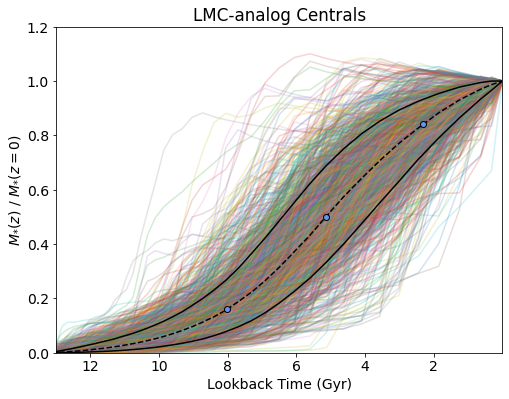

In [236]:
# re-do above graph
plt.rcParams['figure.figsize'] = [8, 6]

for i in range(1000): # already used random_1000_indices above so don't need to re-shuffle here --> 1000 lines, not 10000 items
    plt.plot(x_axis_gyr, y_list[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.ylim(0, 1.2)
    plt.xlabel('Lookback Time (Gyr)') 
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('LMC-analog Centrals')
    
lmc_16 = np.percentile(np.array(y_list), 16, axis=0)
lmc_50 = np.percentile(np.array(y_list), 50, axis=0)
lmc_84 = np.percentile(np.array(y_list), 84, axis=0)
    
plt.plot(x_axis_gyr, lmc_16, color = 'black')
plt.plot(x_axis_gyr, lmc_50, linestyle = 'dashed', color = 'black')
plt.plot(x_axis_gyr, lmc_84, color = 'black')

plt.scatter(np.interp(0.16, lmc_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, lmc_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, lmc_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('LMC-analog Centrals')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

### **Step 6:** Obtain the satellites galaxies of the above sample.

In [237]:
# key:
# smvec2 = halocat["sm"][:] --> vector of stellar masses of each galaxy at present-day 
# upid = halocat["upid"][:] --> ID of largest parent halo (if not central)
# id_test = halocat["id"][:] --> read the full halo ID vector into memory for determining parent halos
# classical2 = indices into the catalogs for central galaxies with stellar mass restrictions

In [238]:
correct_ids = []
for i in (np.random.choice(classical2, size = 10000, replace = False)): # test with size = 100 first
    correct_ids.append(np.where(upid == id_test[i]))

In [239]:
# correct_ids --> outer indices match classical2's indices (random 1000); inner values are actual parent IDs of satellites 

In [240]:
np.where(upid == id_test[classical2[0]])

(array([ 348,  665,  695,  737, 1350, 1396, 1683, 1944, 2391, 2411, 2496,
        2684, 3155, 3269, 3448, 3521, 4165, 4251, 4444, 4459, 4580, 4589,
        4754, 4980, 5037, 5038, 5044, 5105, 5184, 5223, 5322, 5329, 5367,
        5377, 5485, 5564, 5585, 5650, 5651, 5656, 5720, 5737, 5761]),)

In [241]:
correct_ids[0] # same as above b/c correct_ids was looped from classical2's range of first 1000

(array([6256270, 6256284, 6256468, 6257183, 6257192, 6257316, 6258548,
        6258838, 6259197, 6259294, 6259318, 6259526, 6259688, 6259791,
        6260301, 6260670, 6260840, 6261263, 6261309, 6261634, 6261688,
        6261721, 6261751, 6262123, 6262402, 6263604, 6263780, 6264585,
        6265415, 6265908]),)

In [242]:
# correct_ids[0] is a tuple
# correct_ids[0][0] is an array
# correct_ids[0][0][i] gives the value of the INDEX

In [243]:
# test with one tuple first before loop
correct_ids[0]

(array([6256270, 6256284, 6256468, 6257183, 6257192, 6257316, 6258548,
        6258838, 6259197, 6259294, 6259318, 6259526, 6259688, 6259791,
        6260301, 6260670, 6260840, 6261263, 6261309, 6261634, 6261688,
        6261721, 6261751, 6262123, 6262402, 6263604, 6263780, 6264585,
        6265415, 6265908]),)

In [244]:
upid[correct_ids[0]] # each index in correct_ids has the same largest parent halo b/c the upid is all the same #

array([26805507639, 26805507639, 26805507639, 26805507639, 26805507639,
       26805507639, 26805507639, 26805507639, 26805507639, 26805507639,
       26805507639, 26805507639, 26805507639, 26805507639, 26805507639,
       26805507639, 26805507639, 26805507639, 26805507639, 26805507639,
       26805507639, 26805507639, 26805507639, 26805507639, 26805507639,
       26805507639, 26805507639, 26805507639, 26805507639, 26805507639])

In [245]:
# how to get number of values in one array:
len(correct_ids[0][0]) 

30

In [246]:
len(id_test)

53750825

In [247]:
# loops to get indices
sat_ids = []
for i in range(10000):
    for j in range(len(correct_ids[i][0])):
        sat_ids.append(correct_ids[i][0][j])

In [248]:
# sat_ids --> type = list, length = 27150 indices

In [249]:
# test with one index first
smvec2[sat_ids[0]] # stellar mass of ONE satellite
# ^ less than 1 E+08 (lower limit of central, makes sense for satellite)
# ^^ sat_masses[0] = smvec2[sat_ids[0]
sat_masses = smvec2[sat_ids] # all satellite masses

In [250]:
# plt.hist(np.log10(sat_masses))

### **Step 7:** Plot the star formation history and median curves of the satellites.

In [251]:
# combined graph - takes a several mins to run
# plt.rcParams['figure.figsize'] = [8, 6]

sat_y_list = []
for i in range(10000): 
    sat_y_axis = (SMds[sat_ids[i], :]) / (smvec2[sat_ids[i]])
    sat_y_list.append(sat_y_axis)

for i in range(1000):
    plt.plot(x_axis_gyr, sat_y_list[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('Satellites of LMC-analogs')
    
sat_16 = np.percentile(np.array(sat_y_list), 16, axis=0)
sat_50 = np.percentile(np.array(sat_y_list), 50, axis=0)
sat_84 = np.percentile(np.array(sat_y_list), 84, axis=0)
    
plt.plot(x_axis_gyr, sat_16, color = 'black')
plt.plot(x_axis_gyr, sat_50, linestyle = 'dashed', color = 'black')
plt.plot(x_axis_gyr, sat_84, color = 'black')

plt.scatter(np.interp(0.16, sat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, sat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, sat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('Satellites of LMC-analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

### **Step 8:** Differentiate the classes of satellites.

In [252]:
# two classes of satellites: classical (1 E+05 - 1 E+07) and ultra faint (<1 E+05)

In [253]:
# classical class
c_ids = np.where( (sat_masses >= 1e5) & (sat_masses < 1e7) )[0]
# indices into the catalogs for classical satellite galaxies with stellar mass restrictions

In [254]:
sat_masses[c_ids]

array([8570069.  , 2037445.8 ,  674321.1 , ...,  126968.87,  582957.2 ,
        175919.81], dtype=float32)

In [255]:
len(c_ids) # 4170 out of 27150 = ~15.4% of all satellites

43233

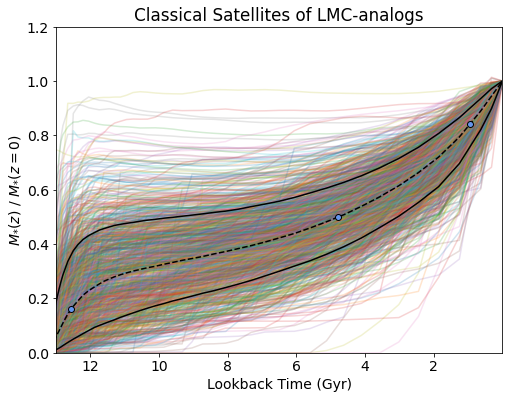

In [256]:
# combined plot for classical satellites of LMC
plt.rcParams['figure.figsize'] = [8, 6]

c_y_list = []
for i in range(10000): # increasing for comparative plots 
    c_y_axis = (SMds[sat_ids[c_ids[i]], :]) / (smvec2[sat_ids[c_ids[i]]])
    c_y_list.append(c_y_axis)

for i in range(1000):
    plt.plot(x_axis_gyr, c_y_list[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.ylim(0, 1.2)
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('Classical Satellites of LMC-analogs')
    
c_sat_16 = np.percentile(np.array(c_y_list), 16, axis=0)
c_sat_50 = np.percentile(np.array(c_y_list), 50, axis=0)
c_sat_84 = np.percentile(np.array(c_y_list), 84, axis=0)
    
plt.plot(x_axis_gyr, c_sat_16, color = "black")
plt.plot(x_axis_gyr, c_sat_50, linestyle = "dashed", color = "black")
plt.plot(x_axis_gyr, c_sat_84, color = "black")

plt.scatter(np.interp(0.16, c_sat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, c_sat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, c_sat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('Classical Satellites of LMC-analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

In [257]:
# ultra faint dwarfs (UFD) class
ufd_ids = np.where(sat_masses < 1e5)[0]
# indices into the catalogs for UF satellite galaxies with stellar mass restrictions

In [258]:
sat_masses[ufd_ids]

array([54890.67  , 59344.426 , 91865.87  , ...,  3589.9375,  6951.114 ,
        1195.2028], dtype=float32)

In [259]:
len(ufd_ids) # 22461 out of 27150 = ~82.7% of all satellites

232213

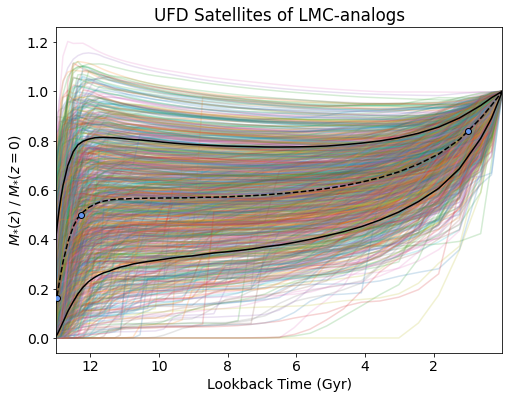

In [260]:
# combined plot for UFD satellites of LMC
plt.rcParams['figure.figsize'] = [8, 6]

ufd_y_list = []
for i in range(10000): 
    ufd_y_axis = (SMds[sat_ids[ufd_ids[i]], :]) / (smvec2[sat_ids[ufd_ids[i]]])
    ufd_y_list.append(ufd_y_axis)

for i in range(1000):
    plt.plot(x_axis_gyr, ufd_y_list[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('UFD Satellites of LMC-analogs')
    
ufd_sat_16 = np.percentile(np.array(ufd_y_list), 16, axis=0)
ufd_sat_50 = np.percentile(np.array(ufd_y_list), 50, axis=0)
ufd_sat_84 = np.percentile(np.array(ufd_y_list), 84, axis=0)
    
plt.plot(x_axis_gyr, ufd_sat_16, color = "black")
plt.plot(x_axis_gyr, ufd_sat_50, linestyle = "dashed", color = "black")
plt.plot(x_axis_gyr, ufd_sat_84, color = "black")

plt.scatter(np.interp(0.16, ufd_sat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, ufd_sat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, ufd_sat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('UFD Satellites of LMC-analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

In [261]:
# 519 galaxies were not counted
misc = np.where(sat_masses > 1e7) # 519 out of 27150 = 1.91%

# mass range:
# max(sat_masses[misc]) # 6.18 E+09
# min(sat_masses[misc]) --> 1.00 E+07

### Central / Isolated Classical Satellites:

In [262]:
c_cen_ids = np.where( (smvec2 >= 1e5) & (smvec2 < 1e7) & (upid == -1) )[0]

In [263]:
len(c_cen_ids)

4185991

In [264]:
type(c_cen_ids)

numpy.ndarray

In [265]:
ufd_cen_ids = np.where( (smvec2 < 1e5) & (upid == -1) )[0]

In [266]:
len(ufd_cen_ids)

31020245

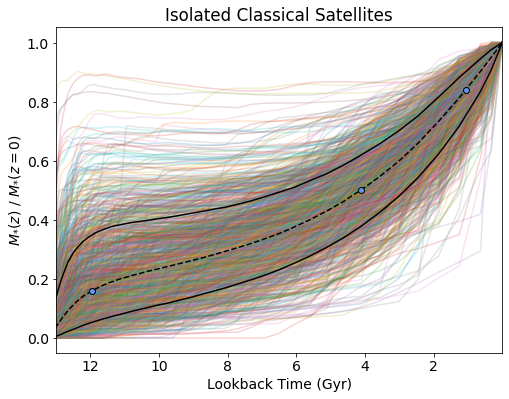

In [267]:
# combined graph - takes a several mins to run
plt.rcParams['figure.figsize'] = [8, 6]

iso_sat_y_list = []
for i in (np.random.choice(range(len(c_cen_ids)), size = 10000, replace = False)):
    iso_sat_y_axis = (SMds[c_cen_ids[i]]) / (smvec2[c_cen_ids[i]])
    iso_sat_y_list.append(iso_sat_y_axis)

for i in range(1000):
    plt.plot(x_axis_gyr, iso_sat_y_list[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('Isolated Classical Satellites')
    
iso_csat_16 = np.percentile(np.array(iso_sat_y_list), 16, axis=0)
iso_csat_50 = np.percentile(np.array(iso_sat_y_list), 50, axis=0)
iso_csat_84 = np.percentile(np.array(iso_sat_y_list), 84, axis=0)
    
plt.plot(x_axis_gyr, iso_csat_16, color = 'black')
plt.plot(x_axis_gyr, iso_csat_50, linestyle = 'dashed', color = 'black')
plt.plot(x_axis_gyr, iso_csat_84, color = 'black')

plt.scatter(np.interp(0.16, iso_csat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, iso_csat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, iso_csat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('Isolated Classical Satellites')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

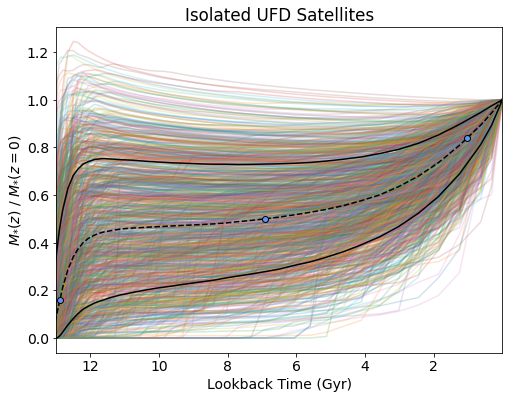

In [268]:
# combined graph - takes a several mins to run
plt.rcParams['figure.figsize'] = [8, 6]

iso_sat_y_list = []
for i in (np.random.choice(range(len(ufd_cen_ids)), size = 10000, replace = False)):
    iso_sat_y_axis = (SMds[ufd_cen_ids[i]]) / (smvec2[ufd_cen_ids[i]])
    iso_sat_y_list.append(iso_sat_y_axis)

for i in range(1000):
    plt.plot(x_axis_gyr, iso_sat_y_list[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('Isolated UFD Satellites')
    
iso_usat_16 = np.percentile(np.array(iso_sat_y_list), 16, axis=0)
iso_usat_50 = np.percentile(np.array(iso_sat_y_list), 50, axis=0)
iso_usat_84 = np.percentile(np.array(iso_sat_y_list), 84, axis=0)
    
plt.plot(x_axis_gyr, iso_usat_16, color = 'black')
plt.plot(x_axis_gyr, iso_usat_50, linestyle = 'dashed', color = 'black')
plt.plot(x_axis_gyr, iso_usat_84, color = 'black')

plt.scatter(np.interp(0.16, iso_usat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, iso_usat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, iso_usat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('Isolated UFD Satellites')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

### **Step 9:** Repeat Steps 3 - 8 for MWs.

In [269]:
# key:
# smvec2 = halocat["sm"][:] --> vector of stellar masses of each galaxy at present-day 
# upid = halocat["upid"][:] --> ID of largest parent halo (if not central)
# id_test = halocat["id"][:] --> read the full halo ID vector into memory for determining parent halos
# classical2 = np.where( (smvec2 > 1e9) & (smvec2 < 1e10) & (upid == -1) )[0]
# ^ indices into the catalogs for central galaxies with stellar mass restrictions

In [270]:
centrals2 = np.where( (smvec2 >= 1e10) & (smvec2 < 1e11) & (upid == -1) )[0]
# indices into the catalogs for central galaxies with stellar mass restrictions (MW) --> counterpart of classical2 

In [271]:
smvec2[centrals2]

array([5.9729826e+10, 7.0112371e+10, 7.0547612e+10, ..., 1.1937491e+10,
       1.4358446e+10, 1.8300420e+10], dtype=float32)

In [272]:
# stellar mass at present day z = 0 
# need to sample 1000 INDICES without replacement so that it can match in num. and denom.

random_1000_indices2 = np.random.choice(centrals2, size = 10000, replace = False) 
random_100_indices2 = np.random.choice(centrals2, size = 100, replace = False) # test case

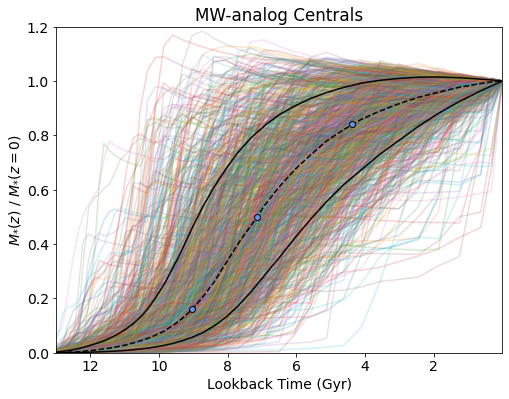

In [273]:
# combined graph - takes a few mins to run
plt.rcParams['figure.figsize'] = [8, 6]

y_list2 = []
for i in range(10000): # already used random_1000_indices above so don't need to re-shuffle here
    y_axis2 = (SMds[random_1000_indices2[i], :]) / (smvec2[random_1000_indices2[i]])
    y_list2.append(y_axis2)

for i in range(1000): 
    plt.plot(x_axis_gyr, y_list2[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.ylim(0, 1.2)
    plt.xlabel('Lookback Time (Gyr)') 
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('MW-analog Centrals')
    
mw_16 = np.percentile(np.array(y_list2), 16, axis=0)
mw_50 = np.percentile(np.array(y_list2), 50, axis=0)
mw_84 = np.percentile(np.array(y_list2), 84, axis=0)
    
plt.plot(x_axis_gyr, mw_16, color = 'black')
plt.plot(x_axis_gyr, mw_50, linestyle = 'dashed', color = 'black')
plt.plot(x_axis_gyr, mw_84, color = 'black')

plt.scatter(np.interp(0.16, mw_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, mw_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, mw_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
pdf.attach_note('MW-analog Centrals')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

### Satellites for MW Hosts + Median Curves:

In [274]:
correct_ids2 = []
for i in (np.random.choice(centrals2, size = 10000, replace = False)): # test with size = 100 first
    correct_ids2.append(np.where(upid == id_test[i]))

In [275]:
# loops to get indices
sat_ids2 = []
for i in range(10000):
    for j in range(len(correct_ids2[i][0])):
        sat_ids2.append(correct_ids2[i][0][j])
        
# len(sat_ids2) = 216040

In [276]:
sat_masses2 = smvec2[sat_ids2] # all satellite masses

In [277]:
# plt.hist(np.log10(sat_masses2))
# plt.title('Histogram of Satellites of MW Hosts')

### Classes of Satellites for MW Hosts:

In [278]:
# classical class
c_ids2 = np.where( (sat_masses2 >= 1e5) & (sat_masses2 < 1e7) )[0]
# indices into the catalogs for classical satellite galaxies with stellar mass restrictions (MW)

# get isolated central dwarfs --> upid == -1

In [279]:
len(sat_masses2[c_ids2]) # 29330 out of 216040 --> 13.6%

287229

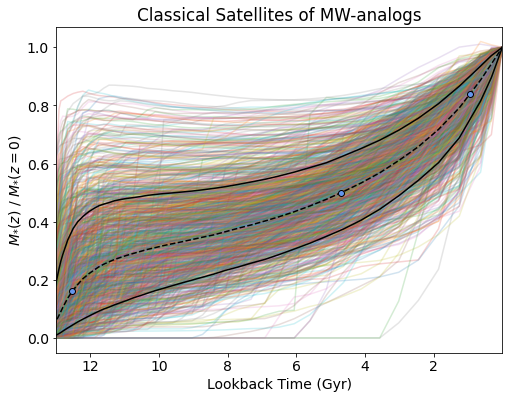

In [280]:
# combined plot for classical satellites of MW
plt.rcParams['figure.figsize'] = [8, 6]

c_y_list2 = []
for i in range(10000): 
    c_y_axis2 = (SMds[sat_ids2[c_ids2[i]], :]) / (smvec2[sat_ids2[c_ids2[i]]])
    c_y_list2.append(c_y_axis2)

for i in range(1000):
    plt.plot(x_axis_gyr, c_y_list2[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('Classical Satellites of MW-analogs')
    
c2_sat_16 = np.percentile(np.array(c_y_list2), 16, axis=0)
c2_sat_50 = np.percentile(np.array(c_y_list2), 50, axis=0)
c2_sat_84 = np.percentile(np.array(c_y_list2), 84, axis=0)
    
plt.plot(x_axis_gyr, c2_sat_16, color = "black")
plt.plot(x_axis_gyr, c2_sat_50, linestyle = "dashed", color = "black")
plt.plot(x_axis_gyr, c2_sat_84, color = "black")

plt.scatter(np.interp(0.16, c2_sat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, c2_sat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, c2_sat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('Classical Satellites of MW-analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

In [281]:
# ultra faint dwarfs:
ufd_ids2 = np.where(sat_masses2 < 1e5)[0]
# indices into the catalogs for classical satellite galaxies with stellar mass restrictions (MW)

In [282]:
len(sat_masses2[ufd_ids2]) # 177210 out of 216040 --> ~82.0%

1494490

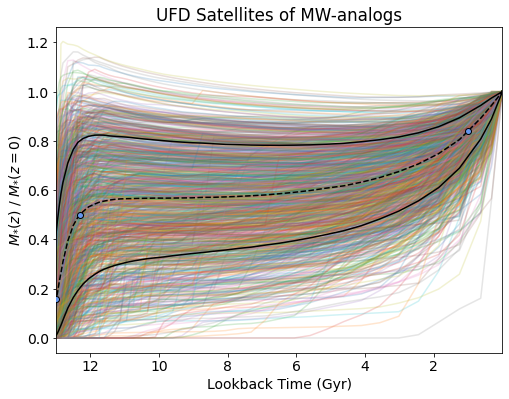

In [283]:
# combined plot for UFD satellites of MW
plt.rcParams['figure.figsize'] = [8, 6]

ufd_y_list2 = []
for i in range(10000): 
    ufd_y_axis2 = (SMds[sat_ids2[ufd_ids2[i]], :]) / (smvec2[sat_ids2[ufd_ids2[i]]])
    ufd_y_list2.append(ufd_y_axis2)

for i in range(1000):
    plt.plot(x_axis_gyr, ufd_y_list2[i], alpha = 0.2)
    plt.xlim(13, min(x_axis_gyr)) 
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('$M_{*}(z)$ / $M_{*}(z=0)$')
    plt.title('UFD Satellites of MW-analogs')
    
ufd2_sat_16 = np.percentile(np.array(ufd_y_list2), 16, axis=0)
ufd2_sat_50 = np.percentile(np.array(ufd_y_list2), 50, axis=0)
ufd2_sat_84 = np.percentile(np.array(ufd_y_list2), 84, axis=0)
    
plt.plot(x_axis_gyr, ufd2_sat_16, color = "black")
plt.plot(x_axis_gyr, ufd2_sat_50, linestyle = "dashed", color = "black")
plt.plot(x_axis_gyr, ufd2_sat_84, color = "black")

plt.scatter(np.interp(0.16, ufd2_sat_50, x_axis_gyr) , 0.16, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.50, ufd2_sat_50, x_axis_gyr) , 0.50, c = 'cornflowerblue', edgecolors = 'black', zorder = 3)
plt.scatter(np.interp(0.84, ufd2_sat_50, x_axis_gyr) , 0.84, c = 'cornflowerblue', edgecolors = 'black', zorder = 3) 
pdf.attach_note('UFD Satellites of MW-analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

In [284]:
# 9500 galaxies were not counted
misc2 = np.where(sat_masses2 > 1e7) # 9500 out of 216040 = 4.40%

# mass range:
# max(sat_masses2[misc2]) # 3.47 E+11
# min(sat_masses2[misc2]) #--> 1.00 E+07

### **Step 10:** Compare all plots.

### Comparative Plots for LMCs:

In [285]:
# # classicals
plt.rcParams['figure.figsize'] = [8, 6]

# y_num = classical LMC median --> c_sat_50
# y_denom = isolated classical median line --> iso_csat_50

plt.plot(x_axis_gyr, (c_sat_50 / iso_csat_50))
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 2)
plt.ylabel('Classicals / Isolated Median')
plt.title('Comparative Classical Plot of LMC-analogs')

In [286]:
# # UFDs
plt.rcParams['figure.figsize'] = [8, 6]

# y_num = UFD LMC median --> ufd_sat_50
# y_denom = isolated UFD median line --> iso_sat_50

plt.plot(x_axis_gyr, (ufd_sat_50 / iso_usat_50))
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 3)
plt.ylabel('Classicals / Isolated Median')
plt.title('Comparative UFD Plot of LMC-analogs')

In [287]:
# combined plot for LMCs
plt.rcParams['figure.figsize'] = [8, 6]

plt.plot(x_axis_gyr, (c_sat_50 / iso_csat_50), label = 'Classicals')
plt.plot(x_axis_gyr, (ufd_sat_50 / iso_usat_50), label = 'UFDs')
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 3)
plt.ylabel('Satellites / Isolated Medians')
plt.title('Comparative Plot of All LMC-analogs')
plt.legend()

### Comparative Plots for MWs:

In [288]:
# classicals
plt.rcParams['figure.figsize'] = [8, 6]

# y_num = classical MW median --> c2_sat_50
# y_denom = isolated classical median line --> iso_csat_50

plt.plot(x_axis_gyr, (c2_sat_50 / iso_csat_50))
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 3)
plt.ylabel('Classicals / Isolated Median')
plt.title('Comparative Classical Plot of MW-analogs')

In [289]:
# UFDs
plt.rcParams['figure.figsize'] = [8, 6]

# y_num = UFD MW median --> ufd2_sat_50
# y_denom = isolated UFD median line --> iso_usat_50

plt.plot(x_axis_gyr, (ufd2_sat_50 / iso_usat_50))
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 3)
plt.ylabel('Classicals / Isolated Median')
plt.title('Comparative UFD Plot of MW-analogs')

In [290]:
# combined plot for MWs
plt.rcParams['figure.figsize'] = [8, 6]

plt.plot(x_axis_gyr, (c2_sat_50 / iso_csat_50), label = 'Classicals')
plt.plot(x_axis_gyr, (ufd2_sat_50 / iso_usat_50), label = 'UFDs')
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 3)
plt.ylabel('Satellites / Isolated Medians')
plt.title('Comparative Plot of All MW-analogs')
plt.legend()

### Total Comparative Plot:

<ipython-input-291-001a10adfe99>:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x_axis_gyr, (c_sat_50 / iso_csat_50), label = 'LMC Classicals')
<ipython-input-291-001a10adfe99>:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(x_axis_gyr, (c_sat_50 / iso_csat_50), label = 'LMC Classicals')
<ipython-input-291-001a10adfe99>:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x_axis_gyr, (ufd_sat_50 / iso_usat_50), label = 'LMC UFDs')
<ipython-input-291-001a10adfe99>:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(x_axis_gyr, (ufd_sat_50 / iso_usat_50), label = 'LMC UFDs')
<ipython-input-291-001a10adfe99>:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x_axis_gyr, (c2_sat_50 / iso_csat_50), label = 'MW Classicals')
<ipython-input-291-001a10adfe99>:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(x_axis_gyr, (c2_sat_50 / iso_csat_50), label = 'MW Classicals')
<ipython-input-291-001a10ad

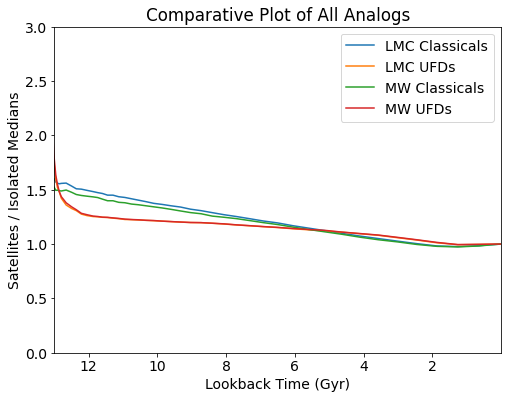

In [291]:
# total combined plot
plt.rcParams['figure.figsize'] = [8, 6]

plt.plot(x_axis_gyr, (c_sat_50 / iso_csat_50), label = 'LMC Classicals')
plt.plot(x_axis_gyr, (ufd_sat_50 / iso_usat_50), label = 'LMC UFDs')
plt.plot(x_axis_gyr, (c2_sat_50 / iso_csat_50), label = 'MW Classicals')
plt.plot(x_axis_gyr, (ufd2_sat_50 / iso_usat_50), label = 'MW UFDs')
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylim(0, 3)
plt.ylabel('Satellites / Isolated Medians')
plt.title('Comparative Plot of All Analogs')
plt.legend()
pdf.attach_note('Comparative Plot of All Analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

### Total Median Plot:

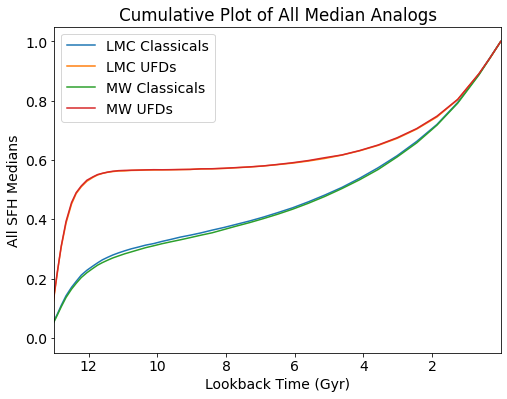

In [292]:
# total combined plot
plt.rcParams['figure.figsize'] = [8, 6]

plt.plot(x_axis_gyr, c_sat_50, label = 'LMC Classicals')
plt.plot(x_axis_gyr, ufd_sat_50, label = 'LMC UFDs')
plt.plot(x_axis_gyr, c2_sat_50, label = 'MW Classicals')
plt.plot(x_axis_gyr, ufd2_sat_50, label = 'MW UFDs')
plt.xlim(13, min(x_axis_gyr)) 
plt.xlabel('Lookback Time (Gyr)')
plt.ylabel('All SFH Medians')
plt.title('Cumulative Plot of All Median Analogs')
plt.legend()
pdf.attach_note('Cumulative Plot of All Median Analogs')
pdf.savefig(bbox_inches = 'tight') # saves the current figure into a pdf page

In [293]:
pdf.close()

This concludes the notebook used to create all of the plots in Lasata Tuladhar's undergraduate Astronomy-Physics thesis. Thank you!